# tf.data

In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7777)
tf.random.set_seed(7777)

## Read a file


- 로컬 환경에 저장되어 있는 파일을 읽어 보겠습니다.

### cifar 데이터를 load하지 않고 로컬에서 읽어 온다. 

In [2]:
os.listdir("../../datasets/") # 파일 조회

['cifar', 'mnist_png']

In [3]:
os.listdir("../../datasets/cifar/train")

['0_frog.png',
 '10000_automobile.png',
 '10001_frog.png',
 '10002_frog.png',
 '10003_ship.png',
 '10004_ship.png',
 '10005_cat.png',
 '10006_deer.png',
 '10007_frog.png',
 '10008_airplane.png',
 '10009_frog.png',
 '1000_truck.png',
 '10010_airplane.png',
 '10011_cat.png',
 '10012_frog.png',
 '10013_frog.png',
 '10014_dog.png',
 '10015_deer.png',
 '10016_ship.png',
 '10017_cat.png',
 '10018_bird.png',
 '10019_frog.png',
 '1001_deer.png',
 '10020_airplane.png',
 '10021_cat.png',
 '10022_automobile.png',
 '10023_deer.png',
 '10024_airplane.png',
 '10025_frog.png',
 '10026_frog.png',
 '10027_bird.png',
 '10028_horse.png',
 '10029_frog.png',
 '1002_cat.png',
 '10030_truck.png',
 '10031_airplane.png',
 '10032_deer.png',
 '10033_dog.png',
 '10034_horse.png',
 '10035_automobile.png',
 '10036_frog.png',
 '10037_horse.png',
 '10038_truck.png',
 '10039_automobile.png',
 '1003_bird.png',
 '10040_horse.png',
 '10041_horse.png',
 '10042_ship.png',
 '10043_airplane.png',
 '10044_cat.png',
 '10045_ho

In [4]:
# 특정 반복되는 형태의 파일을 쉽게 부를 수 있음
glob("../../datasets/cifar/train/*.png")

['../../datasets/cifar/train\\0_frog.png',
 '../../datasets/cifar/train\\10000_automobile.png',
 '../../datasets/cifar/train\\10001_frog.png',
 '../../datasets/cifar/train\\10002_frog.png',
 '../../datasets/cifar/train\\10003_ship.png',
 '../../datasets/cifar/train\\10004_ship.png',
 '../../datasets/cifar/train\\10005_cat.png',
 '../../datasets/cifar/train\\10006_deer.png',
 '../../datasets/cifar/train\\10007_frog.png',
 '../../datasets/cifar/train\\10008_airplane.png',
 '../../datasets/cifar/train\\10009_frog.png',
 '../../datasets/cifar/train\\1000_truck.png',
 '../../datasets/cifar/train\\10010_airplane.png',
 '../../datasets/cifar/train\\10011_cat.png',
 '../../datasets/cifar/train\\10012_frog.png',
 '../../datasets/cifar/train\\10013_frog.png',
 '../../datasets/cifar/train\\10014_dog.png',
 '../../datasets/cifar/train\\10015_deer.png',
 '../../datasets/cifar/train\\10016_ship.png',
 '../../datasets/cifar/train\\10017_cat.png',
 '../../datasets/cifar/train\\10018_bird.png',
 '../..

In [5]:
train_img = glob("../../datasets/cifar/train/*.png")

### TensorFlow 명령어로 Image 읽기


In [6]:
path = train_img[0]
print(path)

../../datasets/cifar/train\0_frog.png


In [8]:
raw = tf.io.read_file(path) # 경로의 파일 읽기
img = tf.io.decode_image(raw) # 파일을 decode하기
img.shape, img.dtype

(TensorShape([32, 32, 3]), tf.uint8)

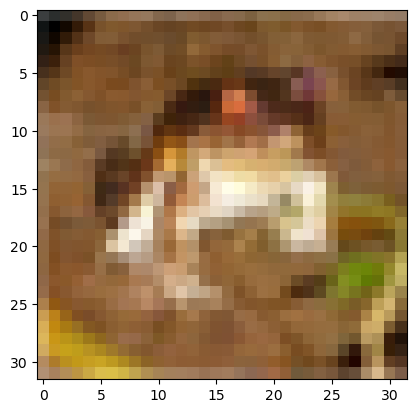

In [9]:
plt.imshow(img)
plt.show()

In [14]:
def read_img(path):
    raw = tf.io.read_file(path)
    img = tf.io.decode_image(raw)
    return img

## 만약에, 이미지가 수백만 장 이라면?? 

In [ ]:
# 요렇게 하면 메모리가 터져버리겠죠???
imgs = []
for path in train_img:
    imgs.append(read_img(path))

## 이럴 때 필요한게 tf.data API! 

 - 미리 이미지 데이터를 모두 불러오는게 아니라 그 때 그 떄 처리를 하는 것
 - 속도도 더 빨라요! 

In [11]:
dataset = tf.data.Dataset.from_tensor_slices(train_img)
# train_img를 하나하나 받아옴

In [12]:
next(iter(dataset))

<tf.Tensor: shape=(), dtype=string, numpy=b'../../datasets/cifar/train\\0_frog.png'>

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
                # .map 이후의 코드를 실행시킴
dataset = dataset.map(read_img, num_parallel_calls=AUTOTUNE)
# num_parallel_calls은 병렬처리 수준을 정하는 것
# AUTOTUNE으로 해두면 자동으로 정해준다. 

In [16]:
next(iter(dataset)) # 텐서 형태로 하나하나 받아와짐

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140]

In [18]:
# 배치 처리
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE) 
        # 앞 코드의 32배치를 읽어들이는 와중에 병렬적으로 그 다음 배치를 읽어들이고 있음
        # 스칼라 값을 넣거나 , AUTOTUNE으로 설정시 자동으로 그 값을 설정해줌

next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 32, 3), dtype=uint8, numpy=
array([[[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],

         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],

         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],

         ...,

         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],

         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],

         [[177, 144, 116],
    

In [19]:
dataset = dataset.shuffle(buffer_size=10) # 내부적으로 얼마만큼 섞을 것인가

In [20]:
# 여러번 epoch을 돌 때
dataset = dataset.repeat() # 입력값으로 숫자를 잘 넣지는 않음
# 아무것도 설정하지 않은채로 이후 for문의 코드에 epoch 숫자를 정해줌

In [ ]:
# 대부분 딥러닝에서의 전처리의 기본 세트
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_img, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE) 
dataset = dataset.shuffle(buffer_size=10) 
dataset = dataset.repeat() 

#### Label도 같이 넘겨주기

In [21]:
train_img[0]

'../../datasets/cifar/train\\0_frog.png'

In [22]:
# 레이블 추출
train_img[0].split("/")[-1].split(".")[0].split("_")[-1]

'frog'

In [24]:
# b' 로 시작 -> .decode('ascii')

label_names = tf.io.read_file("../../datasets/cifar/labels.txt").numpy().decode('ascii').strip().split("\n")
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [25]:
label_names.index('frog')

6

레이블이 몇 번 째 레이블인지 확인 가능

In [26]:
# 하지만 학습에 사용되는 것은 원핫인코딩된 값임
np.array('frog' == np.array(label_names))

array([False, False, False, False, False, False,  True, False, False,
       False])

In [27]:
np.array('frog' == np.array(label_names), dtype = np.float32) # 우리가 원하는 값!

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [28]:
# 전체 데이터셋에 대하여
label_txt = tf.io.read_file("../../datasets/cifar/labels.txt")
label_names = np.array(label_txt.numpy().decode('ascii').strip().split("\n"))

def parse_label(path):
    name = path.split("/")[-1].split(".")[0].split("_")[-1]
    return np.array(name == label_names, dtype=np.float32)

train_y = np.array([parse_label(y) for y in train_img])

In [30]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
def read_data(path, label):
    img = read_img(path)
    return img, label

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((train_img, train_y))

In [35]:
# 대부분 딥러닝에서의 전처리의 기본 세트
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_data, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE) 
dataset = dataset.shuffle(buffer_size=10) 
dataset = dataset.repeat() 

In [36]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
 array([[[[144, 134, 100],
          [128, 114,  78],
          [115, 100,  63],
          ...,
          [ 88,  80,  77],
          [ 94,  86,  84],
          [ 89,  81,  79]],
 
         [[143, 133,  99],
          [126, 113,  77],
          [121, 107,  69],
          ...,
          [ 80,  72,  69],
          [ 83,  75,  73],
          [ 81,  73,  71]],
 
         [[130, 120,  87],
          [125, 112,  76],
          [134, 120,  81],
          ...,
          [ 73,  65,  62],
          [ 76,  68,  66],
          [ 78,  70,  68]],
 
         ...,
 
         [[ 70,  65,  36],
          [ 64,  58,  30],
          [ 67,  62,  32],
          ...,
          [ 62,  56,  30],
          [ 56,  51,  26],
          [ 57,  52,  30]],
 
         [[ 75,  71,  38],
          [ 71,  66,  34],
          [ 75,  70,  38],
          ...,
          [ 63,  58,  30],
          [ 59,  55,  29],
          [ 54,  49,  27]],
 
         [[ 77,  73,  38],
 

이미지에 맞는 레이블도 같이 출력되서 나온다.

#### Label parsing 하는 것도 map 함수로 처리 해보겠습니다. 

```
def read_data(path, label):
    img = read_img(path)
    return img, label
```

위 코드에서 label을 입력값으로 받지 않고 img 코드 아래에 parse_label 함수를 이용해 label을 같이 묶어주는 작업이 훨씬 더 좋을 것이다. 

하지만 위 코드는 numpy로 작업된거라 이후 `dataset.map`을 할 때 에러가 난다. .map 뒤에는 tensor 연산이 와야하기 때문이다.

지금부터 label parsing 작업을 map 함수로 처리해보자.

In [37]:
tf.strings.split(path, '_')

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'../../datasets/cifar/train\\0', b'frog.png'], dtype=object)>

In [39]:
f_name = tf.strings.split(path, '_')[-1]
f_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog.png'>

In [40]:
lbl_name = tf.strings.regex_replace(f_name, '.png', '')
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'frog'>

In [42]:
# 원핫인코딩으로 변환
lbl_name == label_names

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False,  True, False, False,
       False])>

In [43]:
tf.cast(lbl_name == label_names, tf.float32)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [44]:
# 함수로
def get_label(path):
    f_name = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(f_name, '.png', '')

    return tf.cast(lbl_name == label_names, tf.float32)

In [45]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    label = get_label(path)

    return image, label

In [46]:
dataset = tf.data.Dataset.from_tensor_slices(train_img)

# 대부분 딥러닝에서의 전처리의 기본 세트
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE) 
dataset = dataset.shuffle(buffer_size=10) 
dataset = dataset.repeat() 

In [47]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
 array([[[[ 15,  24,  35],
          [ 22,  30,  41],
          [ 26,  34,  45],
          ...,
          [ 21,  20,  28],
          [ 21,  21,  26],
          [ 22,  22,  23]],
 
         [[ 18,  26,  37],
          [ 22,  30,  40],
          [ 23,  31,  42],
          ...,
          [ 21,  20,  28],
          [ 21,  20,  25],
          [ 22,  21,  23]],
 
         [[ 18,  27,  38],
          [ 23,  31,  42],
          [ 23,  31,  42],
          ...,
          [ 21,  20,  28],
          [ 21,  20,  26],
          [ 22,  22,  23]],
 
         ...,
 
         [[ 93,  79,  60],
          [ 88,  72,  55],
          [ 88,  68,  52],
          ...,
          [221, 212, 183],
          [204, 195, 162],
          [205, 195, 167]],
 
         [[ 97,  82,  63],
          [103,  85,  66],
          [128, 105,  88],
          ...,
          [189, 180, 155],
          [213, 206, 176],
          [205, 195, 169]],
 
         [[133, 115, 100],
 

#### 학습

In [48]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2,
                 padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net1_1, net3])
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net = Add()([net, net3])
    
    net = MaxPool2D()(net)
    
    net = Flatten()(net)
    net = Dense(10, activation="softmax")(net)

    model = tf.keras.Model(inputs=inputs, outputs=net, name='resnet')
    
    return model

model = build_resnet((32, 32, 3))
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 32)           896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 8, 8, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             2112      ['max_pooling2d[0][0]']  

In [49]:
learning_rate = 0.03
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [51]:
len(train_img) / 32 # batch size로 나눔

1562.5

In [52]:
model.fit(dataset, epochs = 5, steps_per_epoch=len(train_img) // 32 )

# ValueError: When providing an infinite dataset 에러가 나는 이유는 repeat()을 사용했기 때문
# steps_per_epoch 옵션을 지정해주어야함

Epoch 1/5


1562/1562 [==============================] - 120s 76ms/step - loss: 7.8252 - accuracy: 0.1007
Epoch 2/5
1562/1562 [==============================] - 57s 37ms/step - loss: 2.4034 - accuracy: 0.0984
Epoch 3/5
1562/1562 [==============================] - 68s 43ms/step - loss: 2.3767 - accuracy: 0.1010
Epoch 4/5
1562/1562 [==============================] - 55s 35ms/step - loss: 2.3438 - accuracy: 0.0996
Epoch 5/5
1562/1562 [==============================] - 68s 44ms/step - loss: 2.3287 - accuracy: 0.1002
